<a href="https://colab.research.google.com/github/colaresm/Machine-Learning-Projects/blob/main/Credit_g_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [19]:
df = pd.read_csv('/content/credit-g_csv.csv')

Attribute description

[Dataset link](https://datahub.io/machine-learning/credit-g#data)

    Status of existing checking account, in Deutsche Mark.
    Duration in months
    Credit history (credits taken, paid back duly, delays, critical accounts)
    Purpose of the credit (car, television,…)
    Credit amount
    Status of savings account/bonds, in Deutsche Mark.
    Present employment, in number of years.
    Installment rate in percentage of disposable income
    Personal status (married, single,…) and sex
    Other debtors / guarantors
    Present residence since X years
    Property (e.g. real estate)
    Age in years
    Other installment plans (banks, stores)
    Housing (rent, own,…)
    Number of existing credits at this bank
    Job
    Number of people being liable to provide maintenance for
    Telephone (yes,no)
    Foreign worker (yes,no)


# Visualização dos dados

In [20]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,4,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,2,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,3,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,4,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,4,no known property,53,none,for free,2,skilled,2,none,yes,bad


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Age')

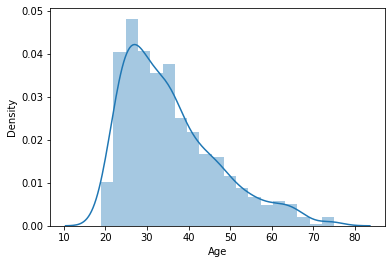

In [22]:
sns.distplot(df['age'])
plt.xlabel('Age')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'duration')

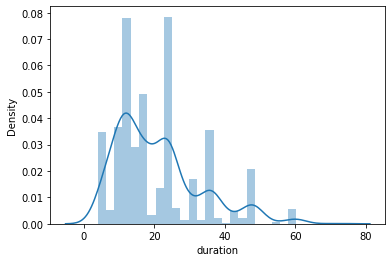

In [27]:
sns.distplot(df['duration'])
plt.xlabel('duration')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'credit_amount')

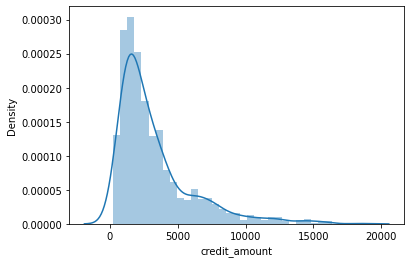

In [29]:
sns.distplot(df['credit_amount'])
plt.xlabel('credit_amount')

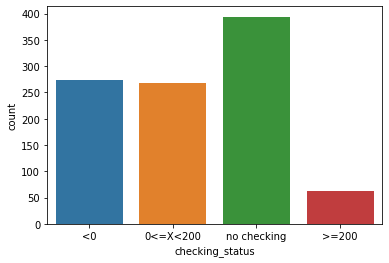

In [28]:
sns.countplot(x="checking_status", data=df)

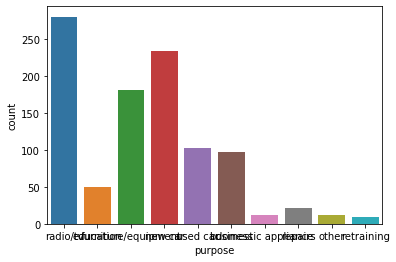

In [44]:
sns.countplot(x="purpose", data=df)

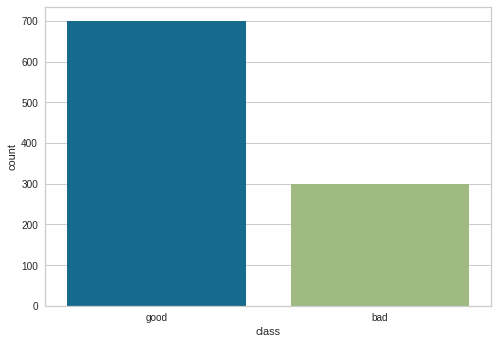

In [203]:
sns.countplot(x="class", data=df)

# Pré-Processamento

## Separação dos dados

In [181]:
X = df.iloc[:, 0:-1].values
X[0]

array(['<0', 6, 'critical/other existing credit', 'radio/tv', 1169,
       'no known savings', '>=7', 4, 'male single', 'none', 4,
       'real estate', 67, 'none', 'own', 2, 'skilled', 1, 'yes', 'yes'],
      dtype=object)

In [182]:
y=df.iloc[:,-1].values
y[0]

'good'

## Label encode

In [183]:
from sklearn.preprocessing import LabelEncoder

In [184]:
label_encoder = LabelEncoder()

In [185]:
X[:,0] = label_encoder.fit_transform(X[:,0])
X[:,2] = label_encoder.fit_transform(X[:,2])
X[:,3] = label_encoder.fit_transform(X[:,3])
X[:,5] = label_encoder.fit_transform(X[:,5])
X[:,6] = label_encoder.fit_transform(X[:,6])
X[:,7] = label_encoder.fit_transform(X[:,7])
X[:,8] = label_encoder.fit_transform(X[:,8])
X[:,9] = label_encoder.fit_transform(X[:,9])
X[:,10] = label_encoder.fit_transform(X[:,10])
X[:,11] = label_encoder.fit_transform(X[:,11])
X[:,13] = label_encoder.fit_transform(X[:,13])
X[:,14] = label_encoder.fit_transform(X[:,14])
X[:,15] = label_encoder.fit_transform(X[:,15])
X[:,16] = label_encoder.fit_transform(X[:,16])
X[:,17] = label_encoder.fit_transform(X[:,17])
X[:,18] = label_encoder.fit_transform(X[:,18])
X[:,19] = label_encoder.fit_transform(X[:,19])
X[0]

array([1, 6, 1, 6, 1169, 4, 3, 3, 3, 2, 3, 3, 67, 1, 1, 1, 1, 0, 1, 1],
      dtype=object)

In [186]:
X[:,1] = (X[:,1]-min(X[:,1]))/  (max(X[:,1])-min(X[:,1])         )       
X[:,4] = (X[:,4]-min(X[:,4]))/  (  max(X[:,4])-min(X[:,4])         )  
X[:,12] = (X[:,12]-min(X[:,12]))/  (  max(X[:,12])-min(X[:,12])         )          

In [187]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [188]:
onehotencoder = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [0,2,3,5,6,7,8,9,10,11,13,14,15,16,17,18,19])], remainder='passthrough')

In [189]:
X = onehotencoder.fit_transform(X).toarray()

In [190]:
X[0]

array([0.        , 1.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 1.        , 0.02941176, 0.05056674,
       0.85714286])

In [191]:
y = label_encoder.fit_transform(y)
y[0]

1

## Rebalanceamento das classes

In [204]:
!pip install imblearn

In [206]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [207]:
smt = SMOTE()

In [208]:
X, y = smt.fit_sample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


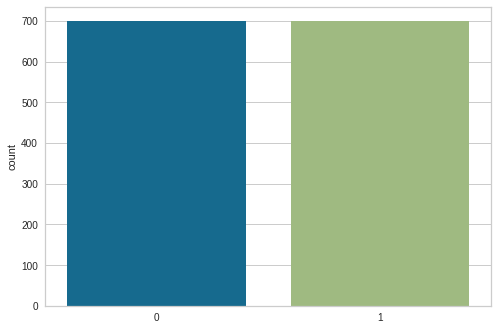

In [209]:
ax = sns.countplot(x=y)

# Treinamento da rede neural

In [210]:
from sklearn.neural_network import MLPClassifier

In [211]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [212]:
rede_neural = MLPClassifier(max_iter=1500, verbose=True, tol=0.0000100,
                                   solver = 'adam', activation = 'relu',
                                   hidden_layer_sizes = (20,20))
rede_neural.fit(X_train, y_train)

Iteration 1, loss = 0.70372768
Iteration 2, loss = 0.68726438
Iteration 3, loss = 0.67533744
Iteration 4, loss = 0.66585009
Iteration 5, loss = 0.65639046
Iteration 6, loss = 0.64670627
Iteration 7, loss = 0.63543249
Iteration 8, loss = 0.62393604
Iteration 9, loss = 0.61114090
Iteration 10, loss = 0.59858448
Iteration 11, loss = 0.58528684
Iteration 12, loss = 0.57139898
Iteration 13, loss = 0.55867278
Iteration 14, loss = 0.54553849
Iteration 15, loss = 0.53273704
Iteration 16, loss = 0.52254627
Iteration 17, loss = 0.51190875
Iteration 18, loss = 0.50343308
Iteration 19, loss = 0.49425372
Iteration 20, loss = 0.48780659
Iteration 21, loss = 0.48145574
Iteration 22, loss = 0.47418906
Iteration 23, loss = 0.47045168
Iteration 24, loss = 0.46353385
Iteration 25, loss = 0.45880845
Iteration 26, loss = 0.45401357
Iteration 27, loss = 0.44956142
Iteration 28, loss = 0.44491735
Iteration 29, loss = 0.44074292
Iteration 30, loss = 0.43748871
Iteration 31, loss = 0.43257923
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=1e-05, validation_fraction=0.1, verbose=True,
              warm_start=False)

Text(0, 0.5, 'Loss')

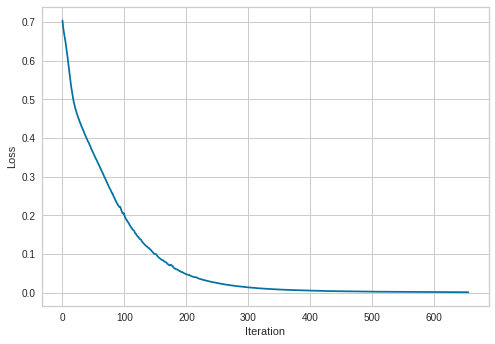

In [213]:
plt.plot(rede_neural.loss_curve_)
plt.xlabel('Iteration')
plt.ylabel('Loss')

In [214]:
previsoes = rede_neural.predict(X_test)
previsoes

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1])

In [215]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test, previsoes)

0.825

Iteration 1, loss = 0.79103303
Iteration 2, loss = 0.74629301
Iteration 3, loss = 0.71681550
Iteration 4, loss = 0.69732031
Iteration 5, loss = 0.68472469
Iteration 6, loss = 0.67490301
Iteration 7, loss = 0.66634925
Iteration 8, loss = 0.65622695
Iteration 9, loss = 0.64631857
Iteration 10, loss = 0.63485203
Iteration 11, loss = 0.62292034
Iteration 12, loss = 0.60995119
Iteration 13, loss = 0.59660554
Iteration 14, loss = 0.58284711
Iteration 15, loss = 0.56978000
Iteration 16, loss = 0.55603072
Iteration 17, loss = 0.54352355
Iteration 18, loss = 0.53220847
Iteration 19, loss = 0.52111959
Iteration 20, loss = 0.51132931
Iteration 21, loss = 0.50265218
Iteration 22, loss = 0.49434835
Iteration 23, loss = 0.48675944
Iteration 24, loss = 0.48060718
Iteration 25, loss = 0.47362569
Iteration 26, loss = 0.46775903
Iteration 27, loss = 0.46319687
Iteration 28, loss = 0.45816911
Iteration 29, loss = 0.45370500
Iteration 30, loss = 0.44931253
Iteration 31, loss = 0.44527111
Iteration 32, los

0.8214285714285714

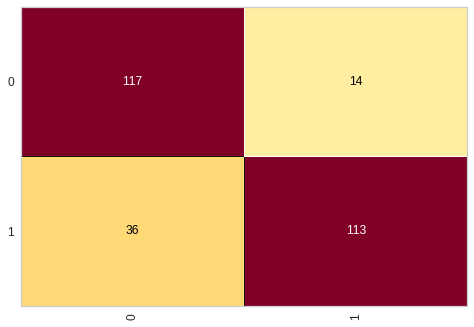

In [216]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rede_neural)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [217]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       131
           1       0.89      0.77      0.82       149

    accuracy                           0.82       280
   macro avg       0.83      0.83      0.82       280
weighted avg       0.83      0.82      0.82       280

